# Wykresy - Zadania

## Zadanie 2.1

Stwórz wykresy funkcji $f(x) = \frac{e^x}{e^x + 1}$ oraz $f(x)=\tanh(x)$ w przedziale $[-10, 10]$. Wykresy umieść na jednym obiekcie *matplotlib*, dodaj podpisy osi i legendę, wykorzystaj różne style i kolory.

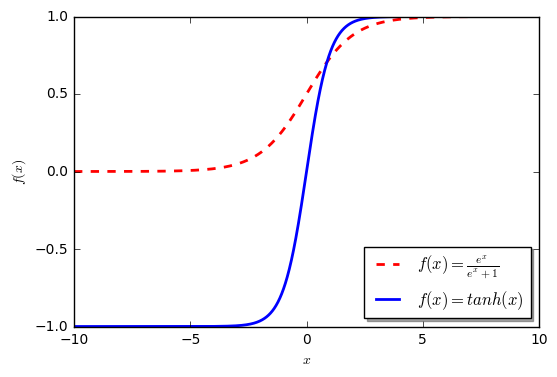

In [104]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# initialize figure
fig = plt.figure()
ax = fig.add_subplot(111)

x = np.arange(-10.0, 10.0, 0.01)
t = np.exp(x)
f1 = t/(t+1) 
f2 = np.tanh(x)
line, = ax.plot(x, f1, color='red', lw=2, linestyle="--", label= r'$f(x)=\frac{e^x}{e^x+1}$')
line, = ax.plot(x, f2, color='blue', lw=2, label='$f(x)=tanh(x)$')

ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')

legend = ax.legend(loc='lower right', shadow=True)



## Zadanie 2.2

Stwórz trójwymiarowy wykres funkcji $f(x,y) = -(x^2 + y^3)$ podobny do poniższego: 
<img src="plot3d.png">

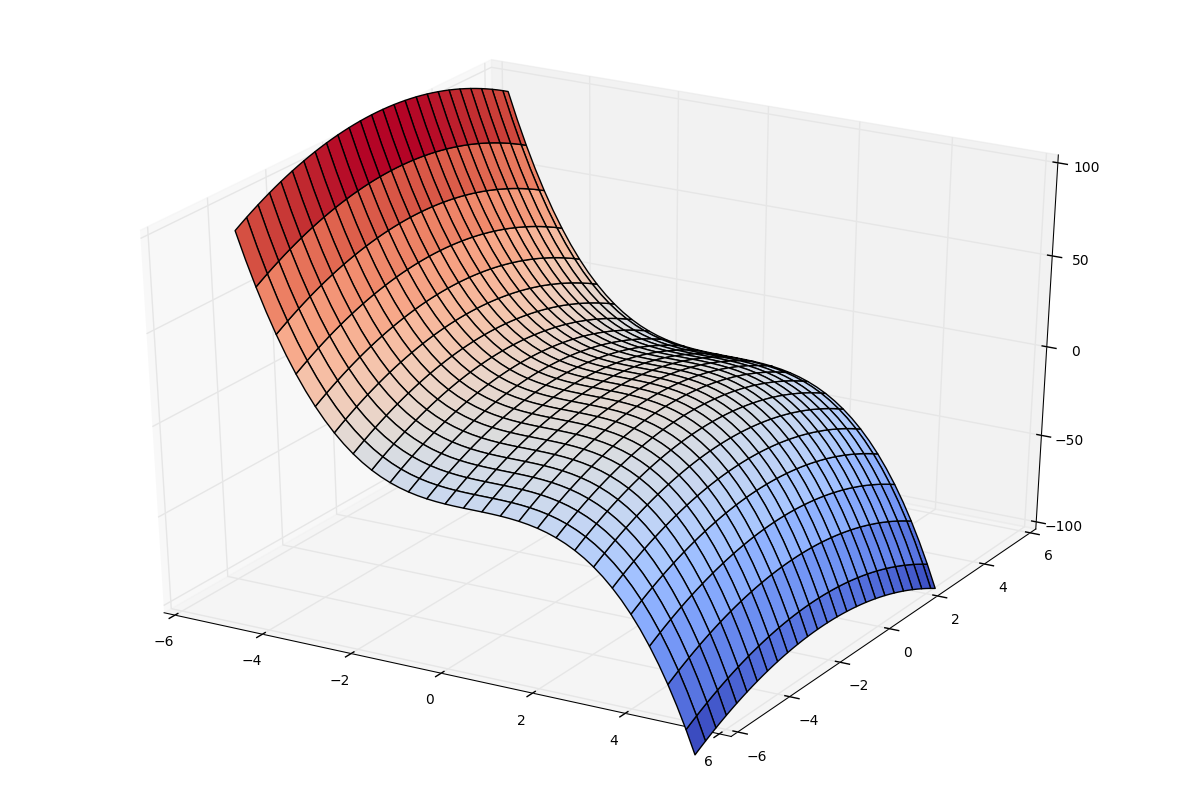

In [1]:
%matplotlib inline
import scipy
from scipy import ndimage

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

X = np.arange(-5, 5, 0.2)
Y = np.arange(-5, 5, 0.2)
X, Y = np.meshgrid(X, Y)
R = -1*(X**2 + Y**3)


surf = ax.plot_surface(Y, X, R, rstride=2, cstride=2, cmap=cm.coolwarm,
        linewidth=1, antialiased=True)

ax.set_zlim(-100, 100)

plt.show()

## Zadanie 2.3

Moduł `numpy.random` zawiera wiele różnych rozkładów prawdopodobieństwa (http://docs.scipy.org/doc/numpy/reference/routines.random.html#distributions). Wybierz cztery dowolne rozkłady inne niż rozkład normalny i przedstaw ich histogramy na jednym obiekcie `matplotlib`. Histogramy powinny być umieszczone na siatce 2x2. Liczba przedziałów to 100. Dla każdego histogramu wybierz różne style, dodaj legendę.

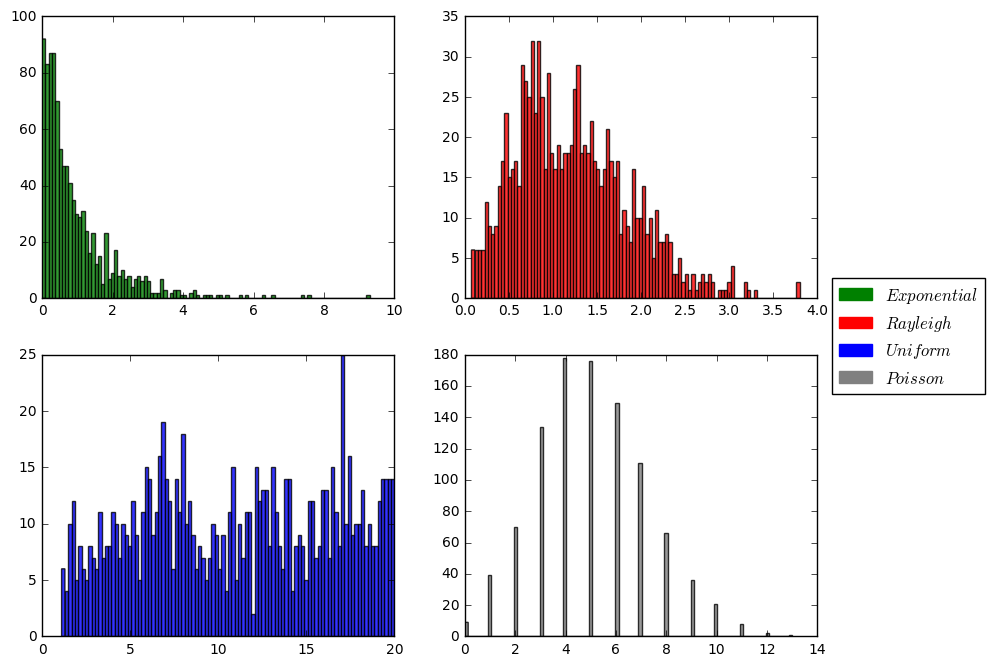

In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(221)
x = np.random.exponential(1, 1000)
num_bins = 100
a = ax.hist(x, num_bins, color='green', alpha=0.8)

bx = fig.add_subplot(222)
x = np.random.rayleigh(1, 1000)
num_bins = 100
b = bx.hist(x, num_bins, color='red', alpha=0.8)

cx = fig.add_subplot(223)
x = np.random.uniform(1, 20, 1000)
num_bins = 100
c = cx.hist(x, num_bins, color='blue', alpha=0.8)

dx = fig.add_subplot(224)
x = np.random.poisson(5, 1000)
num_bins = 100
d = dx.hist(x, num_bins, color='gray', alpha=0.8)

green_patch = mpatches.Patch(color='green', label='$Exponential$')
red_patch = mpatches.Patch(color='red', label='$Rayleigh$')
blue_patch = mpatches.Patch(color='blue', label='$Uniform$')
gray_patch = mpatches.Patch(color='gray', label='$Poisson$')
plt.legend(handles=[green_patch, red_patch, blue_patch, gray_patch], bbox_to_anchor = (1.5, 1.3))

plt.show()

## Zadanie 2.4

W pliku `wine.data` znajduje się zbiór danych, który zawiera pomiary 13 właściwości (cech) charakteryzujących trzy różne gatunki wina. Stwórz dwa wykresy:

1. Wykres dwuwymiarowy przedstawiający zależność dwóch wybranych przez Ciebie właściwości. 
2. Wykres trójwymiarowy, który dodatkowo będzie zawierał trzecią cechę. 

Punkty należące do różnych grup oznacz różnymi kolorami. Dodaj opisy osi oraz legendy. Wykorzystaj poniższy fragment kodu za punkt wyjścia.

Pierwsza kolumna w pliku `wine.data` to klasa (wartość liczbowa 1, 2 lub 3) następnie znajduje się 13 cech. Wszystkie wartości oddzielone są przecinkiem. Szczegółowy opis kolumn znajduje się w pliku `wine.names`.

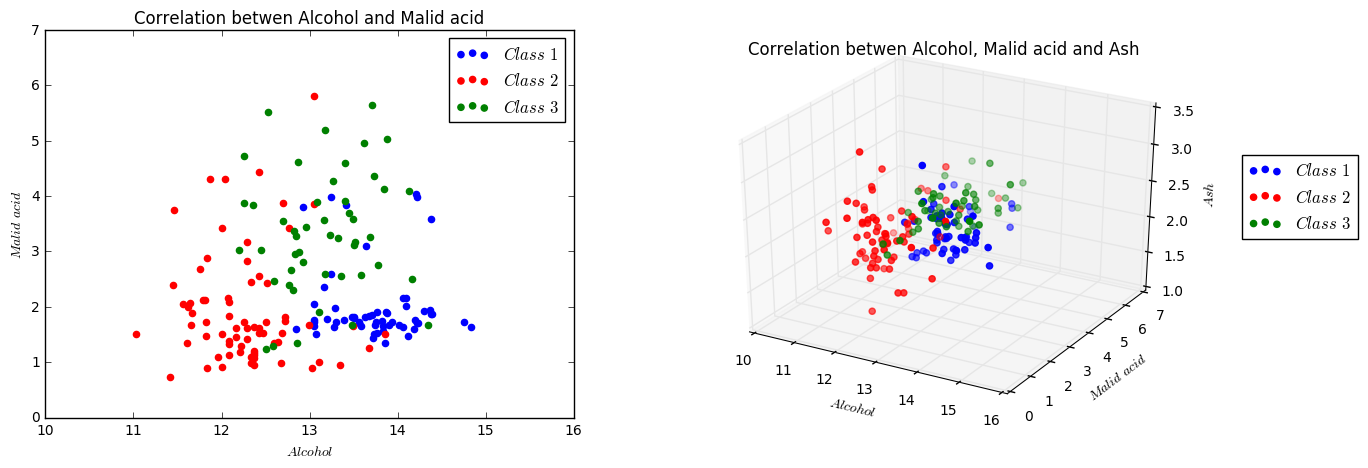

In [3]:
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

reader = csv.reader(open("wine.data"), delimiter=",")

features = []
labels = []
for fields in reader:
    features.append(fields[1:])
    labels.append(fields[0])

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(121)    
bx = fig.add_subplot(122, projection='3d')

x = [[], [], []]
y = [[], [], []]
z = [[], [], []]

i = 0
for key in labels:
    x[int(key)-1].append(float(features[i][0]))
    y[int(key)-1].append(float(features[i][1]))
    z[int(key)-1].append(float(features[i][2]))
    i = i + 1
    
ax.scatter(x[0], y[0], color='blue', label='$Class$ $1$')
ax.scatter(x[1], y[1], color='red', label='$Class$ $2$')
ax.scatter(x[2], y[2], color='green', label='$Class$ $3$')

ax.legend()
ax.set_xlabel('$Alcohol$')
ax.set_ylabel('$Malid$ $acid$')

bx.scatter(x[0], y[0], z[0], color='blue', label='$Class$ $1$')
bx.scatter(x[1], y[1], z[1], color='red', label='$Class$ $2$')
bx.scatter(x[2], y[2], z[2], color='green', label='$Class$ $3$')

bx.legend(bbox_to_anchor=(1.3, 0.7))
bx.set_xlabel('$Alcohol$')
bx.set_ylabel('$Malid$ $acid$')
bx.set_zlabel('$Ash$')

ax.set_title('Correlation betwen Alcohol and Malid acid')
bx.set_title('Correlation betwen Alcohol, Malid acid and Ash')

plt.show()